In [15]:
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils import to_categorical


In [3]:
veriler = []
etiketler = []

konum = "C:/Users/Burak/Desktop/Yüksek Lisans/AnlaşEko/cinsiyet"

In [4]:
print(os.listdir(konum))

['Erkek', 'Kadın']


In [5]:
print(os.listdir(konum + "//" + "Erkek"))

['063429.jpg.jpg', '063430.jpg.jpg', '063438.jpg.jpg', '063443.jpg.jpg', '063453.jpg.jpg', '063460.jpg.jpg', '063474.jpg.jpg', '063477.jpg.jpg', '063478.jpg.jpg', '063479.jpg.jpg', '063489.jpg.jpg', '063491.jpg.jpg', '063495.jpg.jpg', '063496.jpg.jpg', '063500.jpg.jpg', '063503.jpg.jpg', '063508.jpg.jpg', '063513.jpg.jpg', '063515.jpg.jpg', '063517.jpg.jpg', '063518.jpg.jpg', '063520.jpg.jpg', '063531.jpg.jpg', '063539.jpg.jpg', '063543.jpg.jpg', '063544.jpg.jpg', '063547.jpg.jpg', '063549.jpg.jpg', '063550.jpg.jpg', '063558.jpg.jpg', '063571.jpg.jpg', '063573.jpg.jpg', '063575.jpg.jpg', '063580.jpg.jpg', '063581.jpg.jpg', '063584.jpg.jpg', '063592.jpg.jpg', '063593.jpg.jpg', '063594.jpg.jpg', '063595.jpg.jpg', '063604.jpg.jpg', '063611.jpg.jpg', '063613.jpg.jpg', '063615.jpg.jpg', '063618.jpg.jpg', '063619.jpg.jpg', '063620.jpg.jpg', '063627.jpg.jpg', '063630.jpg.jpg', '063631.jpg.jpg', '063633.jpg.jpg', '063636.jpg.jpg', '063638.jpg.jpg', '063645.jpg.jpg', '063646.jpg.jpg', '063650.j

In [6]:
for sınıf in os.listdir(konum):
    for dizin in os.listdir(konum + "//" + sınıf):
        if sınıf == "Erkek":
            etiketler.append(0)
        else:
            etiketler.append(1)
        veriler.append(os.path.join(konum,sınıf,dizin))

df = pd.DataFrame()
df["Resim"], df["Etiket"] = veriler, etiketler
df.head()

,Resim,Etiket
0,C:/Users/Burak/Desktop/Yüksek Lisans/AnlaşEko/...,0
1,C:/Users/Burak/Desktop/Yüksek Lisans/AnlaşEko/...,0
2,C:/Users/Burak/Desktop/Yüksek Lisans/AnlaşEko/...,0
3,C:/Users/Burak/Desktop/Yüksek Lisans/AnlaşEko/...,0
4,C:/Users/Burak/Desktop/Yüksek Lisans/AnlaşEko/...,0


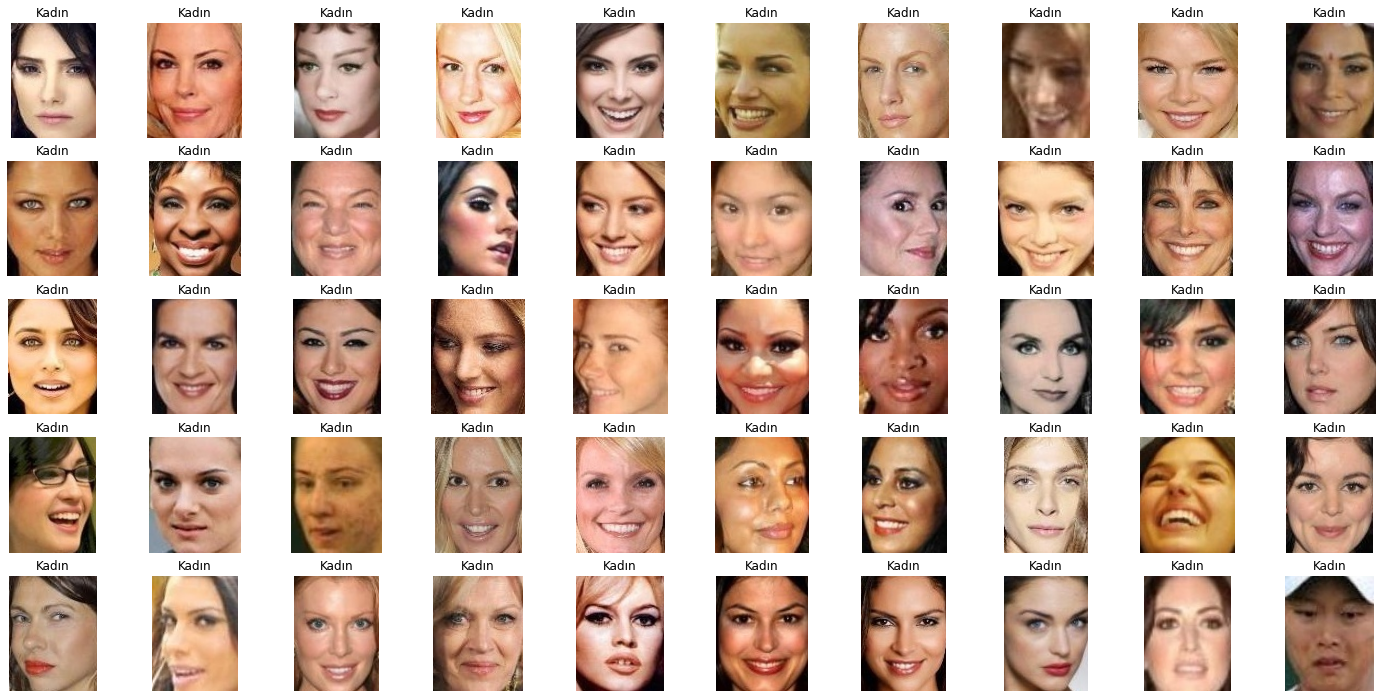

In [7]:
plt.figure(figsize=(25,25))
resim = df[df.Etiket == 1].Resim
aralık = resim[0:50]

for i,j in enumerate(aralık):
    plt.subplot(10,10,i+1)
    resim = load_img(j)
    resim = np.array(resim)
    plt.imshow(resim)
    plt.title("Kadın")
    plt.axis("off")

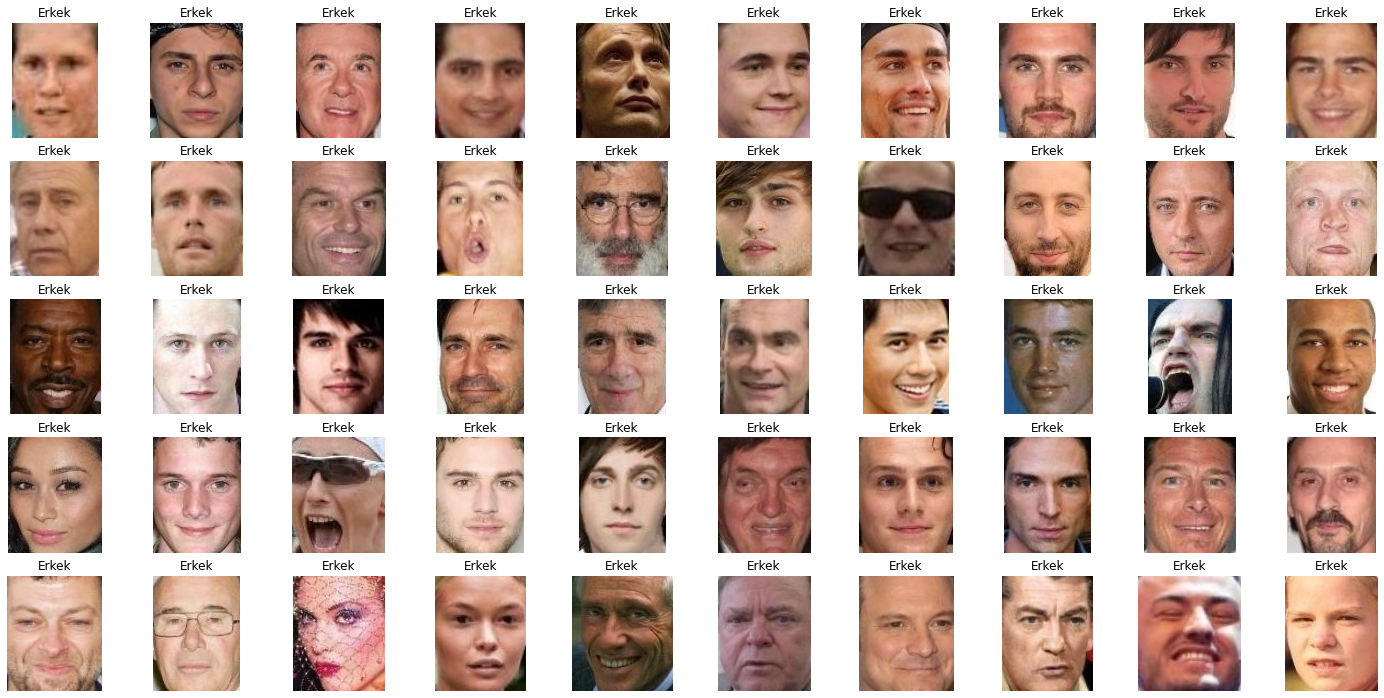

In [8]:
plt.figure(figsize=(25,25))
resim = df[df.Etiket == 0].Resim
aralık = resim[0:50]

for i,j in enumerate(aralık):
    plt.subplot(10,10,i+1)
    resim = load_img(j)
    resim = np.array(resim)
    plt.imshow(resim)
    plt.title("Erkek")
    plt.axis("off")

In [9]:
for sınıf in os.listdir(konum):
    for dizin in os.listdir(konum + "/" + sınıf):
        resim = cv2.imread(os.path.join(konum,sınıf,dizin))
        if resim is None:
            continue

        resim = cv2.resize(resim,(50,50))
        resim = resim.astype("float32")
        resim = resim / 255
        veriler.append(resim)
        
        if sınıf == "Erkek":
            etiketler.append(0)
        else:
            etiketler.append(1)

In [10]:
veriler = np.array(veriler)
etiketler = np.array(etiketler)

In [11]:
np.savez("veriler.npz",veriler)
np.savez("etiketler.npz",etiketler)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [21]:
x = np.load("veriler.npz")["arr_0"]
y = np.load("etiketler.npz")["arr_0"]

y = to_categorical(y,2)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [22]:
x

array(['C:/Users/Burak/Desktop/Yüksek Lisans/AnlaşEko/cinsiyet\\Erkek\\063429.jpg.jpg',
       'C:/Users/Burak/Desktop/Yüksek Lisans/AnlaşEko/cinsiyet\\Erkek\\063430.jpg.jpg',
       'C:/Users/Burak/Desktop/Yüksek Lisans/AnlaşEko/cinsiyet\\Erkek\\063438.jpg.jpg',
       ...,
       'C:/Users/Burak/Desktop/Yüksek Lisans/AnlaşEko/cinsiyet\\Kadın\\202594.jpg.jpg',
       'C:/Users/Burak/Desktop/Yüksek Lisans/AnlaşEko/cinsiyet\\Kadın\\202598.jpg.jpg',
       'C:/Users/Burak/Desktop/Yüksek Lisans/AnlaşEko/cinsiyet\\Kadın\\202599.jpg.jpg'],
      dtype='<U75')

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.15, random_state=0)

In [24]:
x_train.shape

(39887,)

In [ ]:

satır, sütun, katman = x_train.shape[1:]

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(satır, sütun, katman), activation="relu", padding="same", kernel_regularizer=l1_l2(0.0001, 0.0001)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu", padding="same", kernel_regularizer=l1_l2(0.0001, 0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu", padding="same", kernel_regularizer=l1_l2(0.0001, 0.0001)))
model.add(BatchNormalization())

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu", padding="same", kernel_regularizer=l1_l2(0.0001, 0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu", padding="same", kernel_regularizer=l1_l2(0.0001, 0.0001)))
model.add(BatchNormalization())

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu", padding="same", kernel_regularizer=l1_l2(0.0001, 0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2,activation="softmax"))

model.compile(optimizer=Adam(0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

result = model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=30,verbose=0)

model.save("modelim2.h5")

In [ ]:
model = load_model("modelim2.h5")

resim = cv2.imread("woman.jpg")
resim = cv2.resize(resim,(50,50))
resim = np.expand_dims(resim,axis=0)


resim2 = cv2.imread("man.jpg")
resim2 = cv2.resize(resim,(50,50))
resim2 = np.expand_dims(resim,axis=0)


tahmin1 = model.predict(resim)
tahmin2 = model.predict(resim2)

tahmin_sınıf1 = np.argmax(tahmin1)
tahmin_sınıf2 = np.argmax(tahmin2)

In [ ]:
plt.show(resim[0])
plt.title(tahmin_sınıf1)
plt.axis("off")
plt.show()

In [ ]:
plt.show(resim2[0])
plt.title(tahmin_sınıf2)
plt.axis("off")
plt.show()